In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd


dataname = "BRT"
# data_path = f"../../data/{dataset_name}/{dataset_name}.npz"
# data = np.load(data_path)['data'] # (1464, 45)
station_list = ['第一码头', '开禾路口', '思北', '斗西路',
                '二市', '文灶', '金榜公园', '火车站',
                '莲坂', '龙山桥', '卧龙晓城', '东芳山庄',
                '洪文', '前埔枢纽站', '蔡塘', '金山', '市政务服务中心',
                '双十中学', '县后', '高崎机场', 'T4候机楼', '嘉庚体育馆',
                '诚毅学院', '华侨大学', '大学城', '产业研究院', '中科院',
                '东宅', '田厝', '厦门北站', '凤林', '东安', '后田', '东亭',
                '美峰', '蔡店', '潘涂', '滨海新城西柯枢纽', '官浔', '轻工食品园',
                '四口圳', '工业集中区', '第三医院', '城南', '同安枢纽']

data_path = f"../../data/y_hat/GAF_{dataname}_prediction.npz"
data = np.load(data_path)
x = data["x"] # (246, 24, 45)
y = data["y"] # (246, 24, 45)
y_hat = data["y_hat"] # (246, 24, 45)


In [77]:
def get_random_sample(x, y, y_hat):
    num_samples, _, num_vertex = x.shape

    sample_idx = np.random.randint(num_samples)
    vertex_idx = np.random.randint(num_vertex)

    select_x = x[sample_idx, :, vertex_idx]
    select_y = y[sample_idx, :, vertex_idx]
    select_y_hat = y_hat[sample_idx, :, vertex_idx]

    return vertex_idx, select_x, select_y, select_y_hat

vertex, x, y, y_hat = get_random_sample(x, y, y_hat)
# [24]

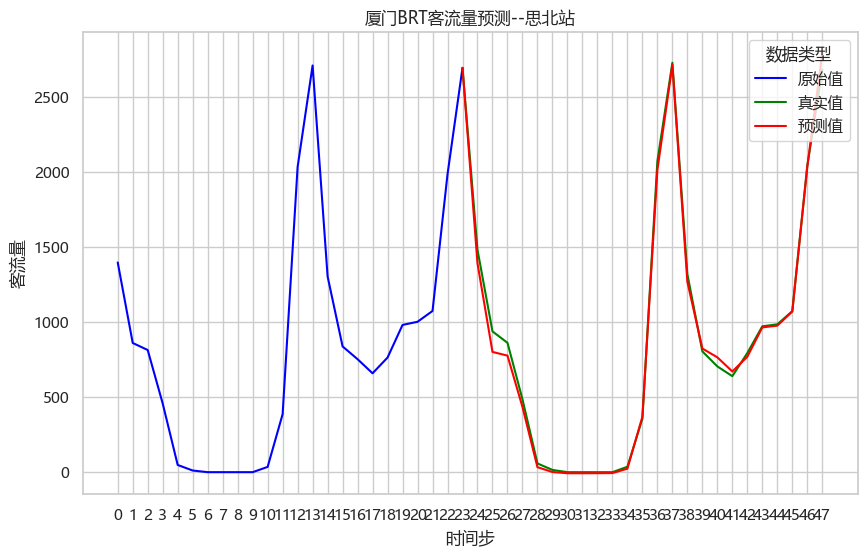

In [78]:
def plot_prediction(x, y, y_hat, dataname, T=24, fontname="Microsoft YaHei"):
    y=np.insert(y,0,x[-1])
    y_hat=np.insert(y_hat,0,x[-1])
    data = pd.DataFrame({
        '时间步': np.arange(T),  # 时间步
        '客流量': x,  # 流量数据
        '数据类型': np.repeat(['原始值'] * T, 1)  # 数据类型
    })
    data_y_hat = pd.DataFrame({
        '时间步': np.tile(np.arange(T-1, T*2),2),  # 时间步
        '客流量': np.concatenate((y, y_hat)),  # 流量数据
        '数据类型': np.repeat(['真实值'] * (T+1) + ['预测值'] * (T+1), 1)  # 数据类型
    })
    data = pd.concat([data, data_y_hat], ignore_index=True)
    # 使用 Seaborn 绘制图形
    plt.figure(figsize=(10,6))
    sns.set_theme(style='whitegrid',font=fontname)
    sns.lineplot(
            x='时间步',
            y='客流量',
            hue='数据类型',
            data=data,
            palette=['blue', 'green', 'red']
        )
    # SimHei黑体
    fontdic={"fontname":fontname}
    plt.xlabel('时间步', fontdict=fontdic)
    plt.ylabel('客流量', fontdict=fontdic)
    plt.title(f'厦门BRT客流量预测--{station_list[vertex]}站', fontdict=fontdic)
    plt.legend(title='数据类型', loc='upper right')
    plt.xticks(np.arange(T*2))
    plt.show()


plot_prediction(x, y, y_hat,dataname=dataname,T=24)